# **SET UP**

In [ ]:
 import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive

#Load Data
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Machine learning project/Kaggle House Price Regression/train.csv')

df.head()

Mounted at /content/drive


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## **Simple visualization**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


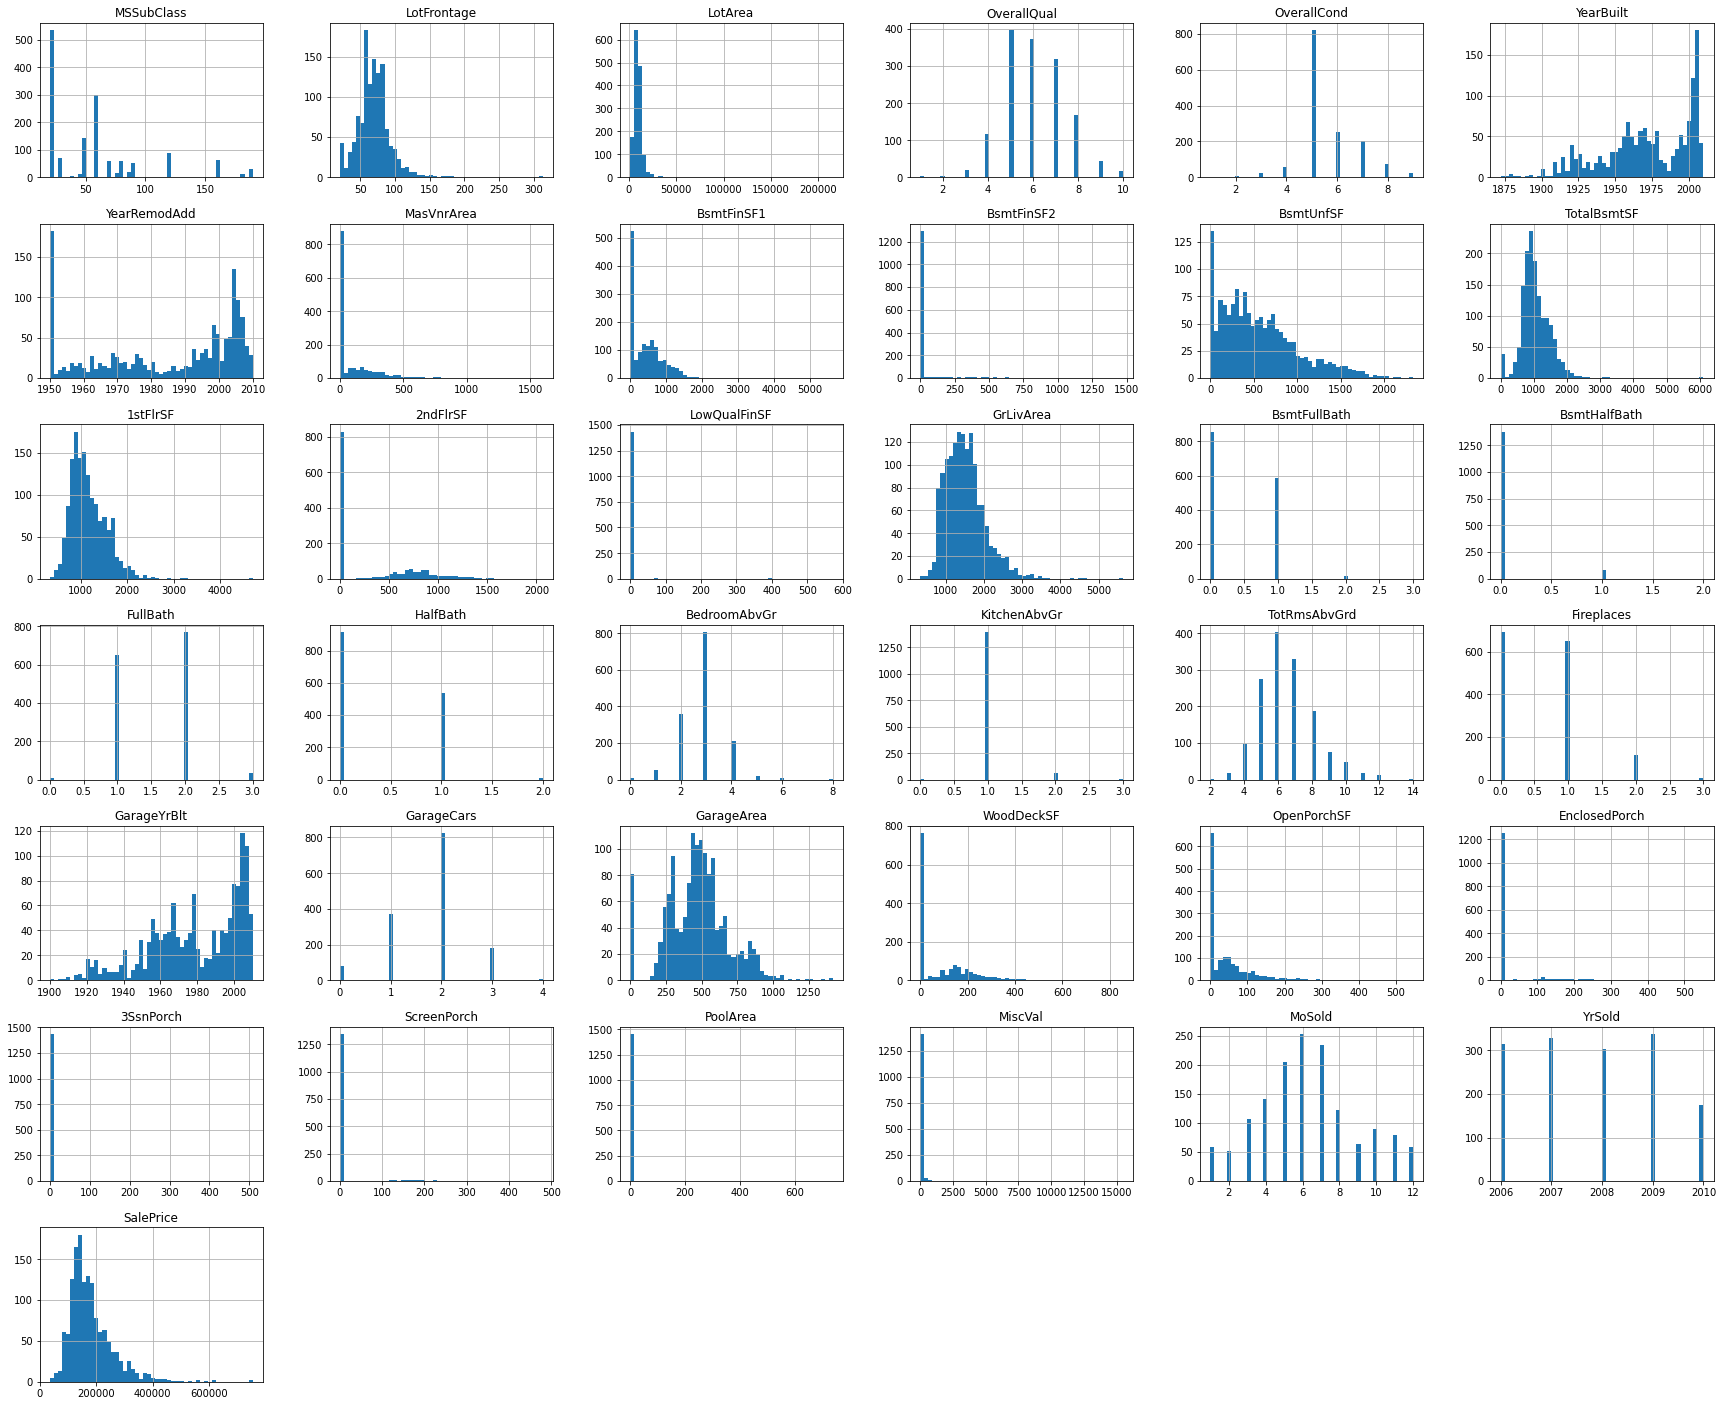

In [ ]:
housing = df.drop('Id', axis=1)

%matplotlib inline
housing.hist(bins=50, figsize=(30,25))
plt.show()

In [ ]:
# List of features with missing values
nulls = df.isnull().sum().sort_values(ascending=False)
print(nulls.head(20))

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64


# **Feature Engineering**


Split dataframe into 2 type:
- Type 1 is for numerical attributes (37 attributes)
- Type 2 is for categorical attributes (43 attributes)

In [ ]:
df_numerics = df.select_dtypes(include=np.number).drop('Id', axis=1)
df_cats = df.select_dtypes(include=['object'])
print("NUMERCIAL DATA FRAME:")
print(df_numerics.info())
print("-------------------------------------------------------------")
print("CATEGORICAL DATA FRAME:")
print(df_cats)
print("-------------------------------------------------------------")

NUMERCIAL DATA FRAME:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null  

## **Handling numerical attributes**

In [ ]:
#Find the correlation between numerical attributes
corr_matrix = df_numerics.corr()
print(corr_matrix)
corr_matrix['SalePrice'].sort_values(ascending=False)

               MSSubClass  LotFrontage   LotArea  ...    MoSold    YrSold  SalePrice
MSSubClass       1.000000    -0.386347 -0.139781  ... -0.013585 -0.021407  -0.084284
LotFrontage     -0.386347     1.000000  0.426095  ...  0.011200  0.007450   0.351799
LotArea         -0.139781     0.426095  1.000000  ...  0.001205 -0.014261   0.263843
OverallQual      0.032628     0.251646  0.105806  ...  0.070815 -0.027347   0.790982
OverallCond     -0.059316    -0.059213 -0.005636  ... -0.003511  0.043950  -0.077856
YearBuilt        0.027850     0.123349  0.014228  ...  0.012398 -0.013618   0.522897
YearRemodAdd     0.040581     0.088866  0.013788  ...  0.021490  0.035743   0.507101
MasVnrArea       0.022936     0.193458  0.104160  ... -0.005965 -0.008201   0.477493
BsmtFinSF1      -0.069836     0.233633  0.214103  ... -0.015727  0.014359   0.386420
BsmtFinSF2      -0.065649     0.049900  0.111170  ... -0.015211  0.031706  -0.011378
BsmtUnfSF       -0.140759     0.132644 -0.002618  ...  0.034888 -

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

### **Data visualization**

- The top 4 correlation features are: *OverallQual* (0.791), *GrLiveArea* (0.708), *GarageCars* (0.640) and *GarageArea*(0.623)
- Visualization make obvious sceneries how compatible these attributes are.

                 SalePrice
OverallQual               
1             50150.000000
2             51770.333333
3             87473.750000
4            108420.655172
5            133523.347607
6            161603.034759
7            207716.423197
8            274735.535714
9            367513.023256
10           438588.388889


[]

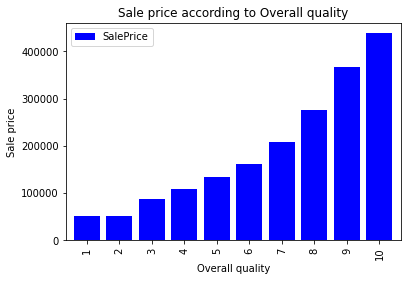

In [ ]:
quality_pivot = df_numerics.pivot_table(index='OverallQual', values='SalePrice')
print(quality_pivot)
quality_pivot.plot(kind='bar', color='blue', width=0.8)
plt.xlabel('Overall quality')
plt.ylabel('Sale price')
plt.title('Sale price according to Overall quality')
plt.plot()

- As we see, the correlation score of OverallQual is up to 0.8. There is no doubt that this feature is the most important one
- It is obvious that the higher overall quality is, the higher price houses can be sold

[]

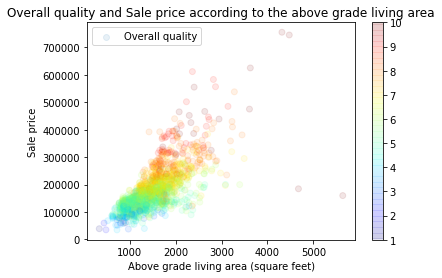

In [ ]:
plt.scatter(x=df['GrLivArea'], y=df['SalePrice'], alpha=0.1, c=df['OverallQual'],cmap=plt.get_cmap("jet"))
plt.xlabel('Above grade living area (square feet)')
plt.ylabel('Sale price')
plt.legend(['Overall quality'])
plt.title('Overall quality and Sale price according to the above grade living area')
plt.colorbar()
plt.plot()

- GrLivArea is the next correlated feature
- The larger area is, the higher sale price
- GrLivArea is also directly proportional to overall quality

[]

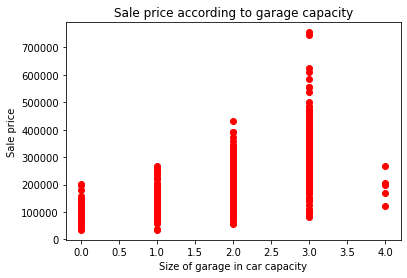

In [ ]:
plt.scatter(x=df['GarageCars'], y=df['SalePrice'], color="red")
plt.xlabel('Size of garage in car capacity')
plt.ylabel('Sale price')
plt.title("Sale price according to garage capacity")
plt.plot()

In [ ]:
#Missing values check
nulls_numerics = df_numerics.isnull().sum()
nulls_numerics

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

- *LotFrontage* and *GarageYrBlt* are the two features have missing values
- *GarageYrBlt* is good correlation to *SalePrice*, so we need to fill NA rather than drop the attribute

In [ ]:
 #Impute data/fill in miss values with median
''' from sklearn.impute import SimpleImputer
housing_numerics = df_numerics.drop('SalePrice', axis=1)
housing_label = df['SalePrice'] '''
''' column_names = list(housing_numerics.columns)

imputer = SimpleImputer(strategy='median')
imputer.fit(housing_numerics)

print("Simple Imputer Estimator: {}".format(imputer.statistics_))

housing_numerics_X = pd.DataFrame(imputer.transform(housing_numerics), columns=column_names)
housing_numerics_X.info() '''

' column_names = list(housing_numerics.columns)\n\nimputer = SimpleImputer(strategy=\'median\')\nimputer.fit(housing_numerics)\n\nprint("Simple Imputer Estimator: {}".format(imputer.statistics_))\n\nhousing_numerics_X = pd.DataFrame(imputer.transform(housing_numerics), columns=column_names)\nhousing_numerics_X.info() '

In [ ]:
''' #Standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
final_numerics = scaler.fit_transform(housing_numerics_X)
final_numerics_df = pd.DataFrame(final_numerics, columns=column_names)
final_numerics.shape '''

(1460, 36)

### **Build a pipline to handle numerical data**
The pipline includes 2 steps:
  - Step 1: SimpleImputer for filling missing values (strategy = median)
  - Step 2: Standardizaton or Standard scaler

In [ ]:
#Build a pipeline for handling numerics data
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

housing_numerics = df_numerics.drop('SalePrice', axis=1)
housing_label = df['SalePrice']

transform_numeric_pipeline = Pipeline([
  ('imputer', SimpleImputer(strategy='median')),
  ('std_scaler', StandardScaler()),
])
final_numerics = transform_numeric_pipeline.fit_transform(housing_numerics)
print('- Numerics data after extraction:')
final_numerics

- Numerics data after extraction:


array([[ 0.07337496, -0.22087509, -0.20714171, ..., -0.08768781,
        -1.5991111 ,  0.13877749],
       [-0.87256276,  0.46031974, -0.09188637, ..., -0.08768781,
        -0.48911005, -0.61443862],
       [ 0.07337496, -0.08463612,  0.07347998, ..., -0.08768781,
         0.99089135,  0.13877749],
       ...,
       [ 0.30985939, -0.1754621 , -0.14781027, ...,  4.95311151,
        -0.48911005,  1.64520971],
       [-0.87256276, -0.08463612, -0.08016039, ..., -0.08768781,
        -0.8591104 ,  1.64520971],
       [-0.87256276,  0.23325479, -0.05811155, ..., -0.08768781,
        -0.1191097 ,  0.13877749]])

## **Handling categorical attributes**

In [ ]:
#Check which columns have null value (NA/NaN)
print("List of features have missing value:")
print(df_cats.isnull().sum())

List of features have missing value:
MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64


In [ ]:
# Build an estimator + transformer to manipulate missing values
# Replace all NA/NaN with static value (default is 'Unavailable')
from sklearn.base import BaseEstimator, TransformerMixin

class fillNA_by_static(BaseEstimator, TransformerMixin):
  def __init__(self, replace='Unvailable'):
    self.replace = replace
  def fit(self, X):
    return self
  def transform(self, X):
    cats_fillNA = X.copy()
    cats_fillNA.fillna(self.replace, inplace=True)
    return cats_fillNA

fill_missing = fillNA_by_static(replace='Unvailable')
df_cats_fill = fill_missing.fit_transform(df_cats)
df_cats_fill

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,Unvailable,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Unvailable,Attchd,RFn,TA,TA,Y,Unvailable,Unvailable,Unvailable,WD,Normal
1,RL,Pave,Unvailable,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,Unvailable,Unvailable,Unvailable,WD,Normal
2,RL,Pave,Unvailable,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,Unvailable,Unvailable,Unvailable,WD,Normal
3,RL,Pave,Unvailable,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,Unvailable,Unvailable,Unvailable,WD,Abnorml
4,RL,Pave,Unvailable,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,Unvailable,Unvailable,Unvailable,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Unvailable,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,Unvailable,Unvailable,Unvailable,WD,Normal
1456,RL,Pave,Unvailable,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,Unvailable,MnPrv,Unvailable,WD,Normal
1457,RL,Pave,Unvailable,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,Unvailable,GdPrv,Shed,WD,Normal
1458,RL,Pave,Unvailable,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,Unvailable,Attchd,Unf,TA,TA,Y,Unvailable,Unvailable,Unvailable,WD,Normal


In [ ]:
# Make an estimator + transformer for Label encoding/Ordinal encoding
from sklearn.preprocessing import OrdinalEncoder

class Ordinal_encode(BaseEstimator, TransformerMixin):
  def __init__(self):
    self.transform_list = []
  def fit(self, X):
    return self
  def transform(self, X):
    encoder = OrdinalEncoder()
    row = X.shape[0]
    column = X.shape[1]
    print(row, column)
    for col in X.columns:
      self.transform_list.append(encoder.fit_transform(X[[col]]))
    final_cats = np.array(self.transform_list).reshape(row, column)
    return final_cats

### **Build a pipline to handle categorical data**
Combine 2 above methods to a "block":
- Step 1: Fill missing values with a static value, default is 'Unvailable'
- Step 2: Encode categories to numbers, use Ordinal encoder

In [ ]:
#Build a pipeline to handel categorical data
transform_cats_pipeline = Pipeline([
    ('fillna_by_static', fillNA_by_Unavailable(replace='Unavailable')),
    ('ordinal_encoder', Ordinal_encode())
])

final_cats = transform_cats_pipeline.fit_transform(df_cats)
print(final_cats)
print('Shape of final_cats: {}'.format(final_cats.shape))

[[3. 3. 3. ... 3. 3. 3.]
 [3. 3. 3. ... 3. 3. 3.]
 [3. 1. 0. ... 3. 4. 3.]
 ...
 [4. 4. 4. ... 4. 4. 4.]
 [4. 5. 4. ... 4. 4. 4.]
 [4. 4. 4. ... 4. 4. 4.]]
Shape of final_cats: (1460, 43)


### **Concat 2 parts to the final dataset**

In [ ]:
#Concat numeric data and categorical data into a complete dataset
final_full = np.concatenate((final_numerics, final_cats), axis=1)
print(final_full)
print("Shape of dataset: {}".format(final_full.shape))

[[ 0.07337496 -0.22087509 -0.20714171 ...  3.          3.
   3.        ]
 [-0.87256276  0.46031974 -0.09188637 ...  3.          3.
   3.        ]
 [ 0.07337496 -0.08463612  0.07347998 ...  3.          4.
   3.        ]
 ...
 [ 0.30985939 -0.1754621  -0.14781027 ...  4.          4.
   4.        ]
 [-0.87256276 -0.08463612 -0.08016039 ...  4.          4.
   4.        ]
 [-0.87256276  0.23325479 -0.05811155 ...  4.          4.
   4.        ]]
Shape of dataset: (1460, 79)


# **Training models**
- Linear Regression
- Decision Tree
- Random Forest

In [ ]:
from sklearn.model_selection import train_test_split

housing_y = df[['SalePrice']].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(final_full, housing_y, random_state=42, test_size=.2)

## **Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred_lin_train = linreg.predict(X_train)
lin_mse_train = mean_squared_error(y_train, y_pred_lin_train)
lin_rmse_train = np.sqrt(lin_mse_train)
print("Train set RMSE: {}".format(lin_rmse_train))

y_pred_lin_test = linreg.predict(X_test)
lin_mse_test = mean_squared_error(y_test, y_pred_lin_test)
lin_rmse_test = np.sqrt(lin_mse)
print("Test set RMSE: {}".format(lin_rmse_test))

Train set RMSE: 33176.89000515196
Test set RMSE: 37087.88361092397


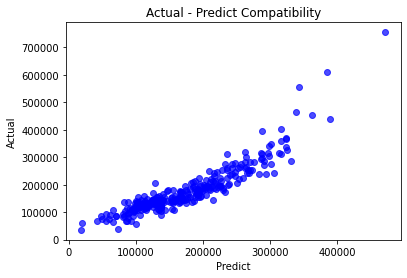

Linear Regression RMSE is: 37087.88361092397


In [ ]:
plt.scatter(y_pred_lin_test, y_test, alpha=0.7, color="blue")
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.title('Actual - Predict Compatibility')
plt.show()
print("Linear Regression RMSE is: {}".format(lin_rmse))

## **Decision Tree**

In [ ]:
#Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

y_pred_tree_train = tree_reg.predict(X_train)
tree_mse_train = mean_squared_error(y_train, y_pred_tree_train)
tree_rmse_train = np.sqrt(tree_mse_train)
print("Train set RMSE: {}".format(tree_rmse_train))

y_pred_tree_test = tree_reg.predict(X_test)
tree_mse_test = mean_squared_error(y_test, y_pred_DeTree)
tree_rmse_test = np.sqrt(tree_mse_test)
print("Test set RMSE: {}".format(tree_rmse_test))

Train set RMSE: 0.0
Test set RMSE: 39328.19369326104


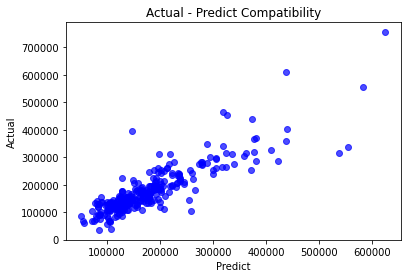

Decision tree RMSE is: 39328.19369326104


In [ ]:
plt.scatter(y_pred_tree_test, y_test, alpha=0.7, color="blue")
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.title('Actual - Predict Compatibility')
plt.show()
print("Decision tree RMSE is: {}".format(tree_rmse_test))

## **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

y_pred_forest_train = forest_reg.predict(X_train)
forest_mse_train = mean_squared_error(y_train, y_pred_forest_train)
forest_rmse_train = np.sqrt(forest_mse_train)
print("Train set RMSE: {}".format(forest_rmse_train))

y_pred_forest_test = forest_reg.predict(X_test)
forest_mse_test = mean_squared_error(y_test, y_pred_forest_test)
forest_rmse_test = np.sqrt(forest_mse_test)
print("Test set RMSE is: {}".format(forest_rmse_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Train set RMSE: 12023.409881781261
Test set RMSE is: 29753.348313506023


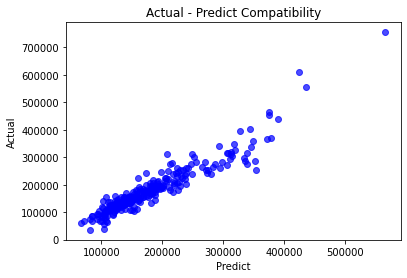

Random Forest RMSE is: 29753.348313506023


In [ ]:
plt.scatter(y_pred_forest_test, y_test, alpha=0.7, color="blue")
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.title('Actual - Predict Compatibility')
plt.show()
print("Random Forest RMSE is: {}".format(forest_rmse_test))

RMSE of Random Forest is the lowest one, or it can be said that Random Forest is the best model.

# **Predict test.csv**

In [ ]:
df_test = pd.read_csv('/content/drive/My Drive/Machine learning project/Kaggle House Price Regression/test.csv')
df_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1459.0,2190.000000,421.321334,1461.0,1825.50,2190.0,2554.50,2919.0
MSSubClass,1459.0,57.378341,42.746880,20.0,20.00,50.0,70.00,190.0
LotFrontage,1232.0,68.580357,22.376841,21.0,58.00,67.0,80.00,200.0
LotArea,1459.0,9819.161069,4955.517327,1470.0,7391.00,9399.0,11517.50,56600.0
OverallQual,1459.0,6.078821,1.436812,1.0,5.00,6.0,7.00,10.0
OverallCond,1459.0,5.553804,1.113740,1.0,5.00,5.0,6.00,9.0
YearBuilt,1459.0,1971.357779,30.390071,1879.0,1953.00,1973.0,2001.00,2010.0
YearRemodAdd,1459.0,1983.662783,21.130467,1950.0,1963.00,1992.0,2004.00,2010.0
MasVnrArea,1444.0,100.709141,177.625900,0.0,0.00,0.0,164.00,1290.0
BsmtFinSF1,1458.0,439.203704,455.268042,0.0,0.00,350.5,753.50,4010.0


In [ ]:
submit = pd.DataFrame()
submit['Id'] = df_test.Id

test_numerics = df_test.select_dtypes(include=[np.number]).drop('Id', axis=1)
test_cats = df_test.select_dtypes(include=['object'])
print("Numeric frame shape: {}".format(test_numerics.shape))
print("Cats frame shape: {}".format(test_cats.shape))
print(test_cats)

Numeric frame shape: (1459, 36)
Cats frame shape: (1459, 43)
     MSZoning Street Alley LotShape  ...  Fence MiscFeature SaleType SaleCondition
0          RH   Pave   NaN      Reg  ...  MnPrv         NaN       WD        Normal
1          RL   Pave   NaN      IR1  ...    NaN        Gar2       WD        Normal
2          RL   Pave   NaN      IR1  ...  MnPrv         NaN       WD        Normal
3          RL   Pave   NaN      IR1  ...    NaN         NaN       WD        Normal
4          RL   Pave   NaN      IR1  ...    NaN         NaN       WD        Normal
...       ...    ...   ...      ...  ...    ...         ...      ...           ...
1454       RM   Pave   NaN      Reg  ...    NaN         NaN       WD        Normal
1455       RM   Pave   NaN      Reg  ...    NaN         NaN       WD       Abnorml
1456       RL   Pave   NaN      Reg  ...    NaN         NaN       WD       Abnorml
1457       RL   Pave   NaN      Reg  ...  MnPrv        Shed       WD        Normal
1458       RL   Pave   NaN

In [ ]:
final_numerics_test = transform_numeric_pipeline.fit_transform(test_numerics)
final_numerics_test.shape

(1459, 36)

In [ ]:
fill_missing_test = fillNA_by_static()
filled_cats_test = fill_missing_test.fit_transform(test_cats)
filled_cats_test

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RH,Pave,Unvailable,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Rec,LwQ,GasA,TA,Y,SBrkr,TA,Typ,Unvailable,Attchd,Unf,TA,TA,Y,Unvailable,MnPrv,Unvailable,WD,Normal
1,RL,Pave,Unvailable,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,TA,Y,SBrkr,Gd,Typ,Unvailable,Attchd,Unf,TA,TA,Y,Unvailable,Unvailable,Gar2,WD,Normal
2,RL,Pave,Unvailable,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Gd,Y,SBrkr,TA,Typ,TA,Attchd,Fin,TA,TA,Y,Unvailable,MnPrv,Unvailable,WD,Normal
3,RL,Pave,Unvailable,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,Fin,TA,TA,Y,Unvailable,Unvailable,Unvailable,WD,Normal
4,RL,Pave,Unvailable,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,Gable,CompShg,HdBoard,HdBoard,None,Gd,TA,PConc,Gd,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Unvailable,Attchd,RFn,TA,TA,Y,Unvailable,Unvailable,Unvailable,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Pave,Unvailable,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,Gable,CompShg,CemntBd,CmentBd,None,TA,TA,CBlock,TA,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,TA,Typ,Unvailable,Unvailable,Unvailable,Unvailable,Unvailable,Y,Unvailable,Unvailable,Unvailable,WD,Normal
1455,RM,Pave,Unvailable,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,Gable,CompShg,CemntBd,CmentBd,None,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,TA,Y,SBrkr,TA,Typ,Unvailable,CarPort,Unf,TA,TA,Y,Unvailable,Unvailable,Unvailable,WD,Abnorml
1456,RL,Pave,Unvailable,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Detchd,Unf,TA,TA,Y,Unvailable,Unvailable,Unvailable,WD,Abnorml
1457,RL,Pave,Unvailable,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,Gable,CompShg,HdBoard,Wd Shng,None,TA,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,TA,Y,SBrkr,TA,Typ,Unvailable,Unvailable,Unvailable,Unvailable,Unvailable,Y,Unvailable,MnPrv,Shed,WD,Normal


In [ ]:
cats_encoder = Ordinal_encode()
final_cats_test = cats_encoder.fit_transform(filled_cats_test)
final_cats_test

1459 43


array([[2., 3., 3., ..., 1., 1., 1.],
       [1., 1., 3., ..., 4., 4., 4.],
       [4., 4., 4., ..., 3., 3., 3.],
       ...,
       [4., 4., 4., ..., 0., 5., 5.],
       [5., 4., 4., ..., 4., 0., 4.],
       [4., 0., 4., ..., 0., 4., 4.]])

In [ ]:
final_full_test = np.concatenate((final_numerics_test, final_cats_test), axis=1)
final_full_test.shape

(1459, 79)

In [ ]:
final_prediction = forest_reg.predict(final_full_test)
submit['SalePrice'] = final_prediction
submit.head()

,Id,SalePrice
0,1461,130911.50
1,1462,154741.00
2,1463,177690.00
3,1464,182030.50
4,1465,209263.67


In [ ]:
submit.to_csv('/content/drive/My Drive/Machine learning project/Kaggle House Price Regression/submit_1.csv', index=False)